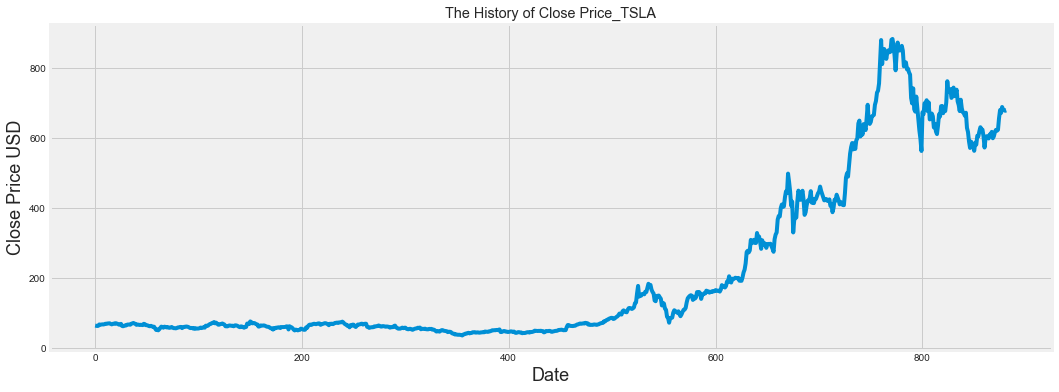

In [1]:
import pandas as pd
import numpy as np
import googlefinance 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50))

# Get the stock quote
# df = DataReader('TSM', data_source='yahoo', start='2012-01-01', end=datetime.now())
df=pd.read_csv("TSLA_2018_2021.csv")
# Show teh data
df


plt.figure(figsize=(16,6))
plt.title('The History of Close Price_TSLA')

plt.plot(df['Close'])

plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [2]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

838

In [3]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03341454],
       [0.03264031],
       [0.03201951],
       [0.03248216],
       [0.03716293],
       [0.03652088],
       [0.03678289],
       [0.03752643],
       [0.03711808],
       [0.03802449],
       [0.03970041],
       [0.03908906],
       [0.0403755 ],
       [0.040739  ],
       [0.04102934],
       [0.03940064],
       [0.03745326],
       [0.03868306],
       [0.04025984],
       [0.03938411],
       [0.04138813],
       [0.04019374],
       [0.0388955 ],
       [0.0363887 ],
       [0.03658698],
       [0.03919055],
       [0.0321635 ],
       [0.03102812],
       [0.03228152],
       [0.03415336],
       [0.03383469],
       [0.03661059],
       [0.03694577],
       [0.03677582],
       [0.03642883],
       [0.03946673],
       [0.04085468],
       [0.04212223],
       [0.04060446],
       [0.03873263],
       [0.0358694 ],
       [0.03685843],
       [0.03644063],
       [0.035225  ],
       [0.03619278],
       [0.03543744],
       [0.03498187],
       [0.039

In [4]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03341454, 0.03264031, 0.03201951, 0.03248216, 0.03716293,
       0.03652088, 0.03678289, 0.03752643, 0.03711808, 0.03802449,
       0.03970041, 0.03908906, 0.0403755 , 0.040739  , 0.04102934,
       0.03940064, 0.03745326, 0.03868306, 0.04025984, 0.03938411,
       0.04138813, 0.04019374, 0.0388955 , 0.0363887 , 0.03658698,
       0.03919055, 0.0321635 , 0.03102812, 0.03228152, 0.03415336,
       0.03383469, 0.03661059, 0.03694577, 0.03677582, 0.03642883,
       0.03946673, 0.04085468, 0.04212223, 0.04060446, 0.03873263,
       0.0358694 , 0.03685843, 0.03644063, 0.035225  , 0.03619278,
       0.03543744, 0.03498187, 0.03931093, 0.03844465, 0.0348544 ,
       0.03461128, 0.03360809, 0.0317693 , 0.0310588 , 0.03247035,
       0.03071654, 0.02893204, 0.0295552 , 0.02365407, 0.01860271])]
[0.02057368667376782]

[array([0.03341454, 0.03264031, 0.03201951, 0.03248216, 0.03716293,
       0.03652088, 0.03678289, 0.03752643, 0.03711808, 0.03802449,
       0.03970041, 0.03908906, 0.04

In [5]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
778/778 [==============================] - 16s 19ms/step - loss: 0.0034
Epoch 2/10
778/778 [==============================] - 15s 19ms/step - loss: 0.0018
Epoch 3/10
778/778 [==============================] - 15s 19ms/step - loss: 9.4759e-04
Epoch 4/10
778/778 [==============================] - 13s 17ms/step - loss: 0.0013
Epoch 5/10
778/778 [==============================] - 14s 17ms/step - loss: 0.0013
Epoch 6/10
778/778 [==============================] - 13s 17ms/step - loss: 8.8021e-04
Epoch 7/10
778/778 [==============================] - 12s 16ms/step - loss: 6.2968e-04
Epoch 8/10
778/778 [==============================] - 13s 17ms/step - loss: 9.2459e-04
Epoch 9/10
778/778 [==============================] - 13s 17ms/step - loss: 7.0982e-04
Epoch 10/10
778/778 [==============================] - 14s 18ms/step - loss: 6.6852e-04


In [6]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

29.31246290376973

<ipython-input-7-1427d3ba85c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


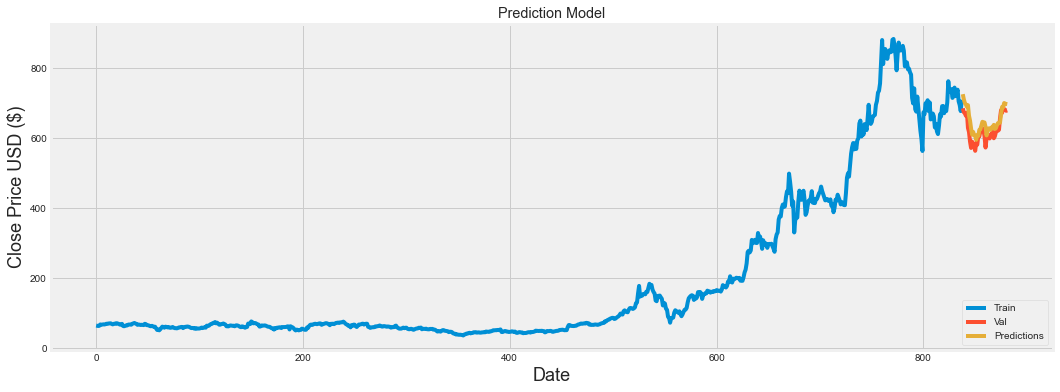

In [7]:

#training data 
train = data[:training_data_len]

# testing data
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [8]:
# Show the valid and predicted pricesv
train

,Close
0,64.106003
1,63.450001
2,62.924000
3,63.316002
4,67.281998
...,...
833,738.200012
834,704.739990
835,694.400024
836,677.000000
